In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



In [3]:
data=pd.read_csv("/home/hemanth/Documents/XGBoosting/phishing.csv")

In [4]:
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [5]:
data.tail()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
11049,11049,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,11050,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,11051,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11052,11052,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11053,11053,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,11054.0,5526.500000,3191.159272,0.0,2763.25,5526.5,8289.75,11053.0
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.00,1.0,1.00,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.00,-1.0,-1.00,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.00,1.0,1.00,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.00,1.0,1.00,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.00,1.0,1.00,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.00,-1.0,-1.00,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.00,0.0,1.00,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.00,1.0,1.00,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.00,-1.0,1.00,1.0


In [8]:
data.isna().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [9]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


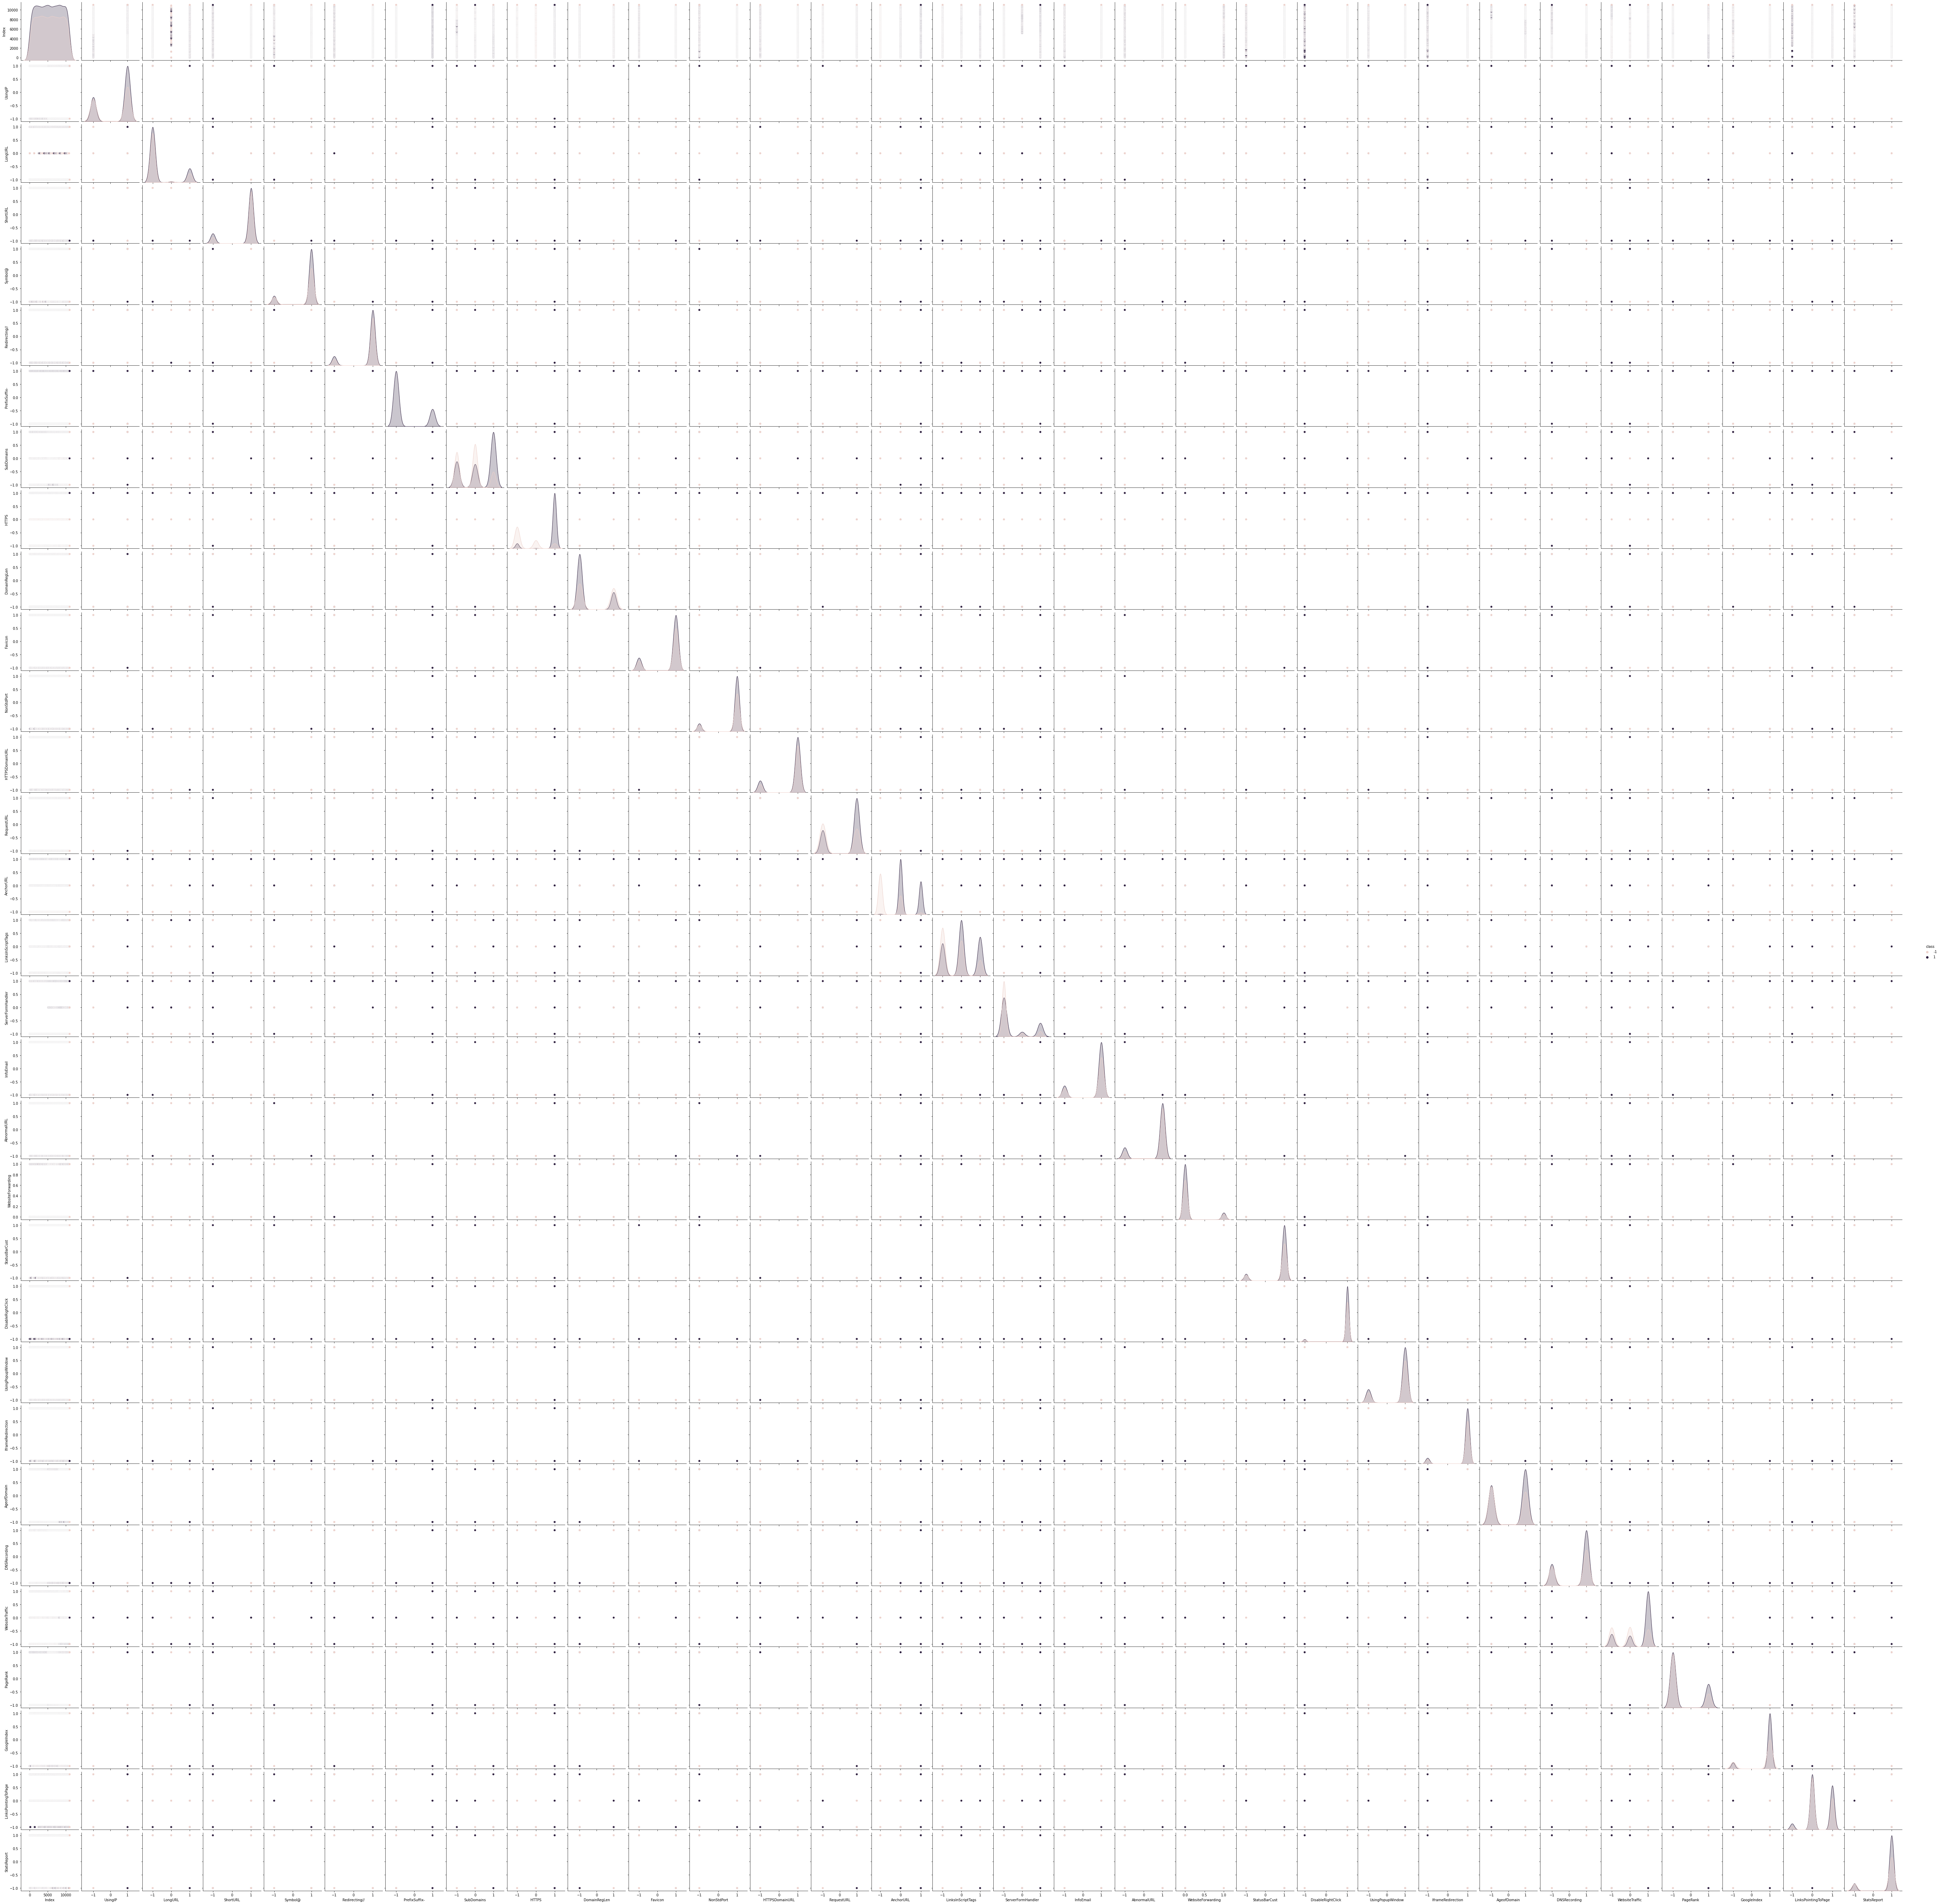

In [134]:
sns.pairplot(data,hue='class')

In [137]:
x=data.drop('class',axis=1)

In [138]:
y=data['class']

In [139]:
x.shape

(11054, 31)

In [140]:
y.shape

(11054,)

# Train_Test_splite

In [141]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)


In [142]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(7737, 31)
(3317, 31)
(7737,)
(3317,)


In [143]:
logreg=LogisticRegression()
model_logreg=logreg.fit(X_train,y_train)

/home/hemanth/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
logreg_predict= model_logreg.predict(X_test)

In [145]:
accuracy_score(logreg_predict,y_test)

0.9276454627675611

In [146]:
print(classification_report(logreg_predict,y_test))

              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1400
           1       0.95      0.92      0.94      1917

    accuracy                           0.93      3317
   macro avg       0.92      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [147]:
def plot_confusion_matrix(y_test, predict_y):
 C = confusion_matrix(y_test, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.light_palette("#9370db")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

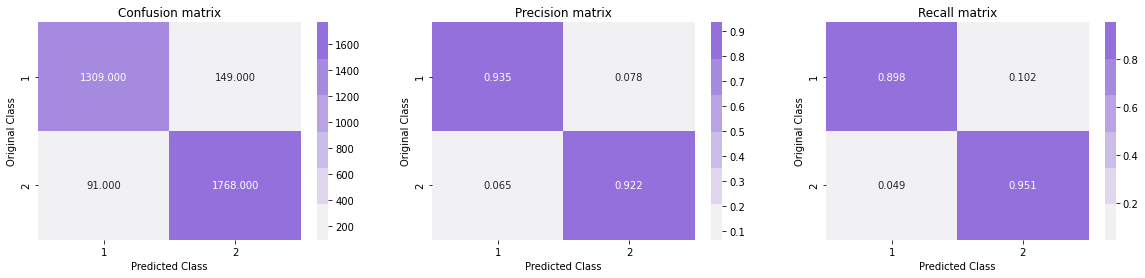

In [148]:
plot_confusion_matrix(y_test, logreg_predict)



# K-Nearest Neighbors Classifier and check its accuracy

In [149]:
knn=KNeighborsClassifier(n_neighbors=3)
model_knn= knn.fit(X_train,y_train)

In [150]:
knn_predict=model_knn.predict(X_test)


In [151]:
accuracy_score(knn_predict,y_test)

0.6343081097377148

In [152]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

          -1       0.58      0.59      0.59      1458
           1       0.68      0.67      0.67      1859

    accuracy                           0.63      3317
   macro avg       0.63      0.63      0.63      3317
weighted avg       0.63      0.63      0.63      3317



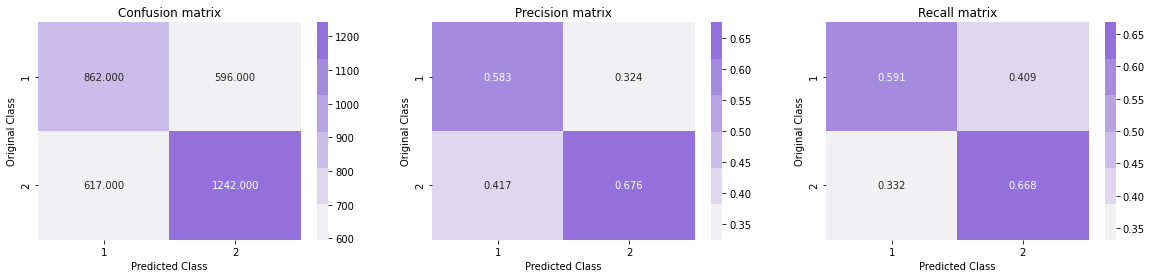

In [153]:
plot_confusion_matrix(y_test, knn_predict)

# SVM and check its accuracy

In [154]:
svc=SVC()
model_svm=svc.fit(X_train,y_train)

In [155]:
svm_predict=model_svm.predict(X_test)

In [156]:
accuracy_score(svm_predict,y_test)

0.5604461863129334

In [157]:
print(classification_report(svm_predict,y_test))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.56      0.72      3317

    accuracy                           0.56      3317
   macro avg       0.50      0.28      0.36      3317
weighted avg       1.00      0.56      0.72      3317



/home/hemanth/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-147-d55f46619641>:4: RuntimeWarning: invalid value encountered in true_divide
  B =(C/C.sum(axis=0))


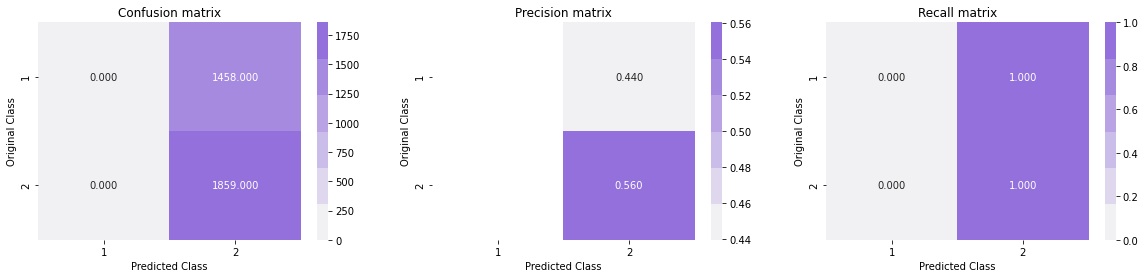

In [158]:
plot_confusion_matrix(y_test, svm_predict)

# AdaBoost Classifier and check its accuracy 

In [159]:
adc=AdaBoostClassifier(n_estimators=5,learning_rate=1)
model_adaboosting=adc.fit(X_train,y_train)

In [160]:
adc_predict=model_adaboosting.predict(X_test)


In [161]:
accuracy_score(adc_predict,y_test)


0.9104612601748568

In [162]:
print(classification_report(adc_predict,y_test))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1403
           1       0.93      0.91      0.92      1914

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



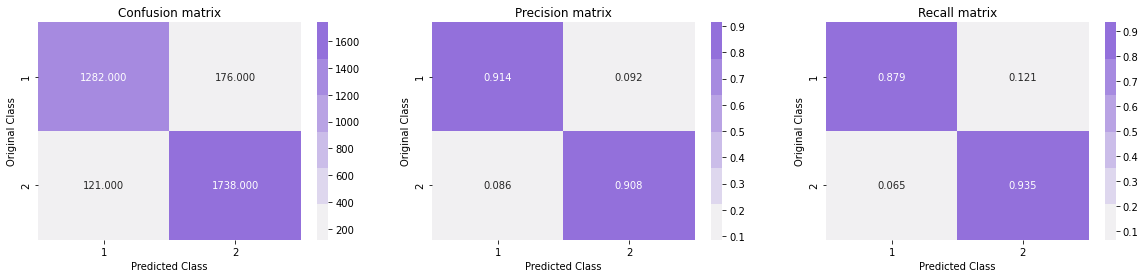

In [163]:
plot_confusion_matrix(y_test, adc_predict)


# XGBoost Classifier and check its accuracy

In [164]:
xgb=XGBClassifier()
model_xgb=xgb.fit(X_train,y_train)

In [165]:
xgb_predict=model_xgb.predict(X_test)

In [166]:
accuracy_score(xgb_predict,y_test)

0.962918299668375

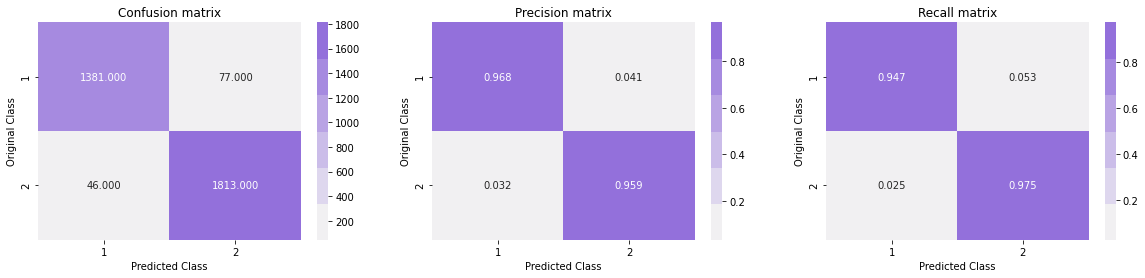

In [167]:
plot_confusion_matrix(y_test, xgb_predict)

# Decision Tree Classifier and check its classifier

In [168]:
dtree=DecisionTreeClassifier()
model_dt=dtree.fit(X_train,y_train)


In [169]:
dtree_predict=model_dt.predict(X_test)


In [170]:
accuracy_score(dtree_predict,y_test)

0.9451311425987338

In [171]:
print(classification_report(dtree_predict,y_test))

              precision    recall  f1-score   support

          -1       0.92      0.95      0.94      1418
           1       0.96      0.94      0.95      1899

    accuracy                           0.95      3317
   macro avg       0.94      0.95      0.94      3317
weighted avg       0.95      0.95      0.95      3317



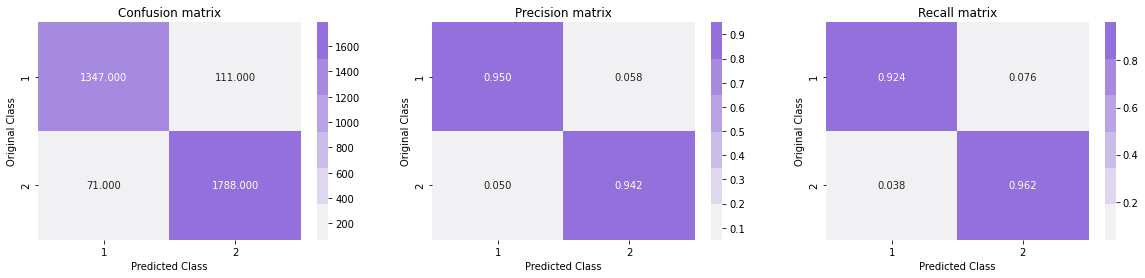

In [172]:
plot_confusion_matrix(y_test, dtree_predict)


# Random Forest Classifier and check its accuracy

In [173]:
rfc=RandomForestClassifier()
model_rf=rfc.fit(X_train,y_train)

In [174]:
rfc_predict=model_rf.predict(X_test)

In [175]:
accuracy_score(rfc_predict,y_test)

0.9719626168224299

In [176]:
print(classification_report(rfc_predict,y_test))

              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1439
           1       0.98      0.97      0.98      1878

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



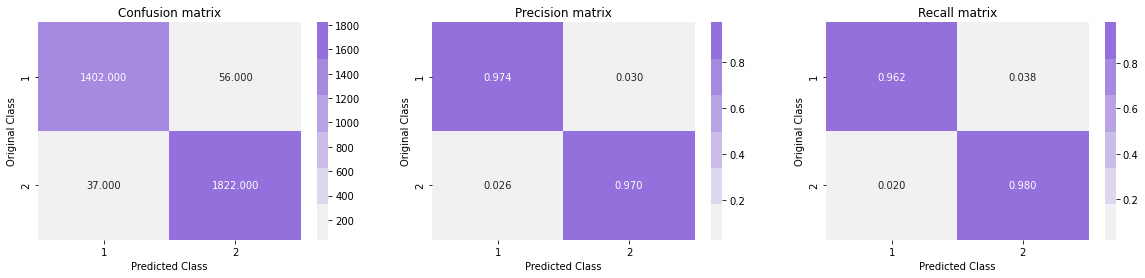

In [177]:
plot_confusion_matrix(y_test, rfc_predict)


In [178]:
print('Logistic Regression Accuracy:',accuracy_score(logreg_predict,y_test))
print('K-Nearest Neighbour Accuracy:',accuracy_score(knn_predict,y_test))
print('Decision Tree Classifier Accuracy:',accuracy_score(dtree_predict,y_test))
print('Random Forest Classifier Accuracy:',accuracy_score(rfc_predict,y_test))
print('support Vector Machine Accuracy:',accuracy_score(svm_predict,y_test))
print('Adaboost Classifier Accuracy:',accuracy_score(adc_predict,y_test))
print('XGBoost Accuracy:',accuracy_score(xgb_predict,y_test))

Logistic Regression Accuracy: 0.9276454627675611
K-Nearest Neighbour Accuracy: 0.6343081097377148
Decision Tree Classifier Accuracy: 0.9451311425987338
Random Forest Classifier Accuracy: 0.9719626168224299
support Vector Machine Accuracy: 0.5604461863129334
Adaboost Classifier Accuracy: 0.9104612601748568
XGBoost Accuracy: 0.962918299668375


# Logistic Regression

In [179]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [180]:
X=data[['PrefixSuffix-','AnchorURL']]
X.head()

,PrefixSuffix-,AnchorURL
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


In [181]:
train_X,test_X,train_Y,test_Y=train_test_split(X,y,test_size=0.3,random_state=2)

In [182]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(7737, 2)
(3317, 2)
(7737,)
(3317,)


In [183]:
model_log=logreg.fit(train_X,train_Y)


In [184]:
logreg_predict=model_log.predict(test_X)



In [185]:
accuracy_score(test_Y,logreg_predict)



0.8411214953271028

In [186]:
logreg.classes_

array([-1,  1])

In [187]:
x = np.array(X)
x

array([[-1,  0],
       [-1,  0],
       [-1,  0],
       ...,
       [-1,  0],
       [-1, -1],
       [-1, -1]])

In [188]:
X = X.to_numpy()
y = data['class']
y= y.to_numpy()



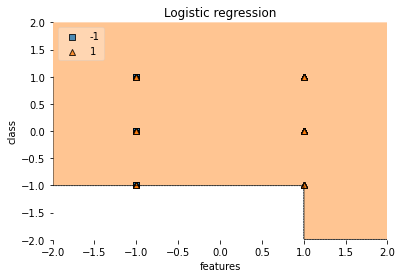

In [189]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y, clf=model_logreg, legend=2)

# Adding axes annotations
plt.xlabel('features')
plt.ylabel('class')
plt.title('Logistic regression')
plt.show()
